In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
from sklearn.datasets import make_blobs

x1, y1 = make_blobs(
  n_samples=1000,
  centers=((3, -3), (1, 1)),
  random_state=1
)

x1 = x1.dot(np.array([[0.4, 1], [0.7, 0.6]]))

x2, y2 = make_blobs(
  n_samples=300,
  centers=1,
  random_state=1
)

x2 = x2 + [6, -3]

x = np.r_[x1, x2]
y = np.r_[y1, y2]

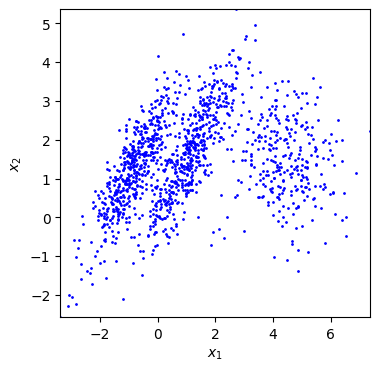

In [30]:
plt.figure(figsize=(4, 4))
plt.scatter(x[:, 0], x[:, 1], color='b', s=1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
mins = x.min(axis=0)
maxs = x.max(axis=0)
plt.axis([mins[0], maxs[0], mins[1], maxs[1]])
plt.show()

## GaussianMixture()

In [31]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(
  n_components=3,
  n_init=10,
  covariance_type='full',
  random_state=1
)

gm.fit(x)

GaussianMixture(n_components=3, n_init=10, random_state=1)

In [32]:
pi = gm.weights_
pi

array([0.38650747, 0.23233747, 0.38115506])

In [33]:
mu = gm.means_
mu

array([[-0.85825108,  1.26229706],
       [ 4.37283221,  1.48414028],
       [ 1.13245359,  1.65188929]])

In [34]:
Sigma = gm.covariances_
Sigma

array([[[ 0.59004708,  0.72708102],
        [ 0.72708102,  1.22730296]],

       [[ 0.97765035, -0.08571483],
        [-0.08571483,  1.01359424]],

       [[ 0.65972267,  0.85201622],
        [ 0.85201622,  1.45487237]]])

### log Likelihood

In [35]:
gm.score_samples(x)

array([-2.72456154, -2.2719355 , -2.1769829 , ..., -4.00439117,
       -3.58332253, -4.59438607])

### Predict(hard)

In [36]:
gm.predict(x)

array([0, 0, 2, ..., 1, 1, 1])

### Predict(soft)

In [37]:
gm.predict_proba(x)

array([[9.89013775e-01, 1.58772476e-05, 1.09703480e-02],
       [9.99142985e-01, 5.36389838e-06, 8.51650836e-04],
       [1.72921921e-04, 2.42484819e-03, 9.97402230e-01],
       ...,
       [9.20779376e-46, 1.00000000e+00, 5.85225346e-22],
       [5.83866954e-24, 9.99999950e-01, 4.98335552e-08],
       [2.96547926e-46, 1.00000000e+00, 2.41443835e-22]])

### Plot

In [38]:
def plot_gaussian_mixture(clusterer, x):
  mins = x.min(axis=0)
  maxs = x.max(axis=0)

  x1s = np.linspace(mins[0], maxs[0], 1000)
  x2s = np.linspace(mins[1], maxs[1], 1000)
  x1, x2 = np.meshgrid(x1s, x2s)
  x_new = np.c_[x1.ravel(), x2.ravel()]
  z = -clusterer.score_samples(x_new).reshape(x1.shape)
  y_pred = clusterer.predict(x_new).reshape(x1.shape)

  plt.contourf(x1, x2, y_pred, alpha=0.2)
  plt.contour(x1, x2, y_pred, linewidths=1, colors='r', linestyles='dashed')
  plt.contour(x1, x2, z, levels=np.linspace(0, 2, 12), linewidths=1, colors='g')

  plt.plot(x[:, 0], x[:, 1], 'k.', markersize=2)
  plt.scatter(mu[:, 0], mu[:, 1], marker='x', s=5,linewidths=10, c='r',alpha=1, zorder=3)

  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  plt.axis([mins[0], maxs[0], mins[1], maxs[1]])

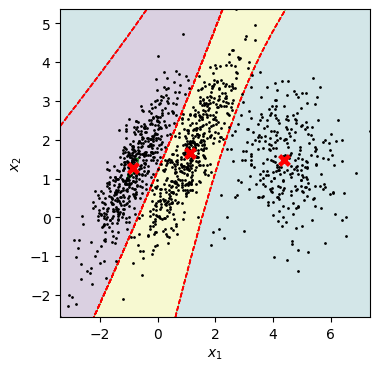

In [39]:
plt.figure(figsize=(4, 4))
plot_gaussian_mixture(gm, x)
plt.show()